**Characterized by high levels of sugar in the blood, Type 2 diabetes can be prevent or delayed with lifestyle changes. By modelling diabetes in patients, individuals can be better informed about their risks of developing the disease.**

In [178]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns",100)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
params={"figure.facecolor":(0.0,0.0,0.0,0),
        "axes.facecolor":(1.0,1.0,1.0,1),
        "savefig.facecolor":(0.0,0.0,0.0,0)}
plt.rcParams.update(params)

In [179]:
df=pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


This dataset is of only Pima Indian females aged 21 and above.

In [180]:
df.shape

(768, 9)

The data has 768 entries, and can be described in 9 columns.

The columns are:
* Pregnancies: the number of times the patient has been pregnant.
* Glucose: the plasma glucose concentration after 2 hours in an oral glucose tolerance test.
* BloodPressure: the aiastolic blood pressure (mm Hg).
* SkinThickness: the triceps skin fold thickness (mm).
* Insulin: 2-Hour serum insulin (mu U/ml).
* BMI: the body mass index.
* DiabetesPedigreeFunction: a function which scores the likelihood of diabetes based on family history.
* Age: the age (years)
* Outcome: "0" as no diabetes, "1" as with diabetes.

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Good, no null values and all the columns are numeric.

In [182]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


But is it possible to have 0 levels of *Glucose*, *BloodPressure*, *SkinThickness*, *Insulin*, *BMI*? Let's take a closer look:

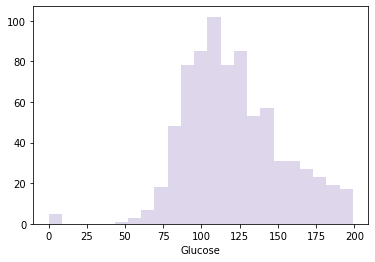

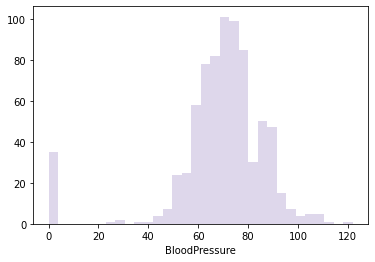

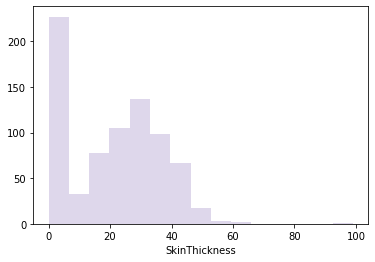

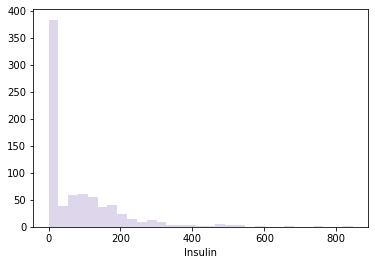

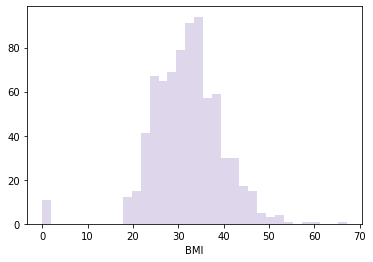

In [183]:
for i in df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]]:
    plt.figure()
    sns.distplot(df[i],kde=False,color="#AE9CCD")

For *Glucose*, *BloodPressure* and *BMI* it is obvious that the 0s must be addressed. While not so obvious in *SkinThickness* and *Insulin* these 0s should also be addressed as it is not possible to have 0mm of skin or 0 mu U/ml of insulin.

As such the 0s should be treated as missing data, and changed to NaN. So then we do have null values...

In [184]:
df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]]=df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0,np.nan)

In [185]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

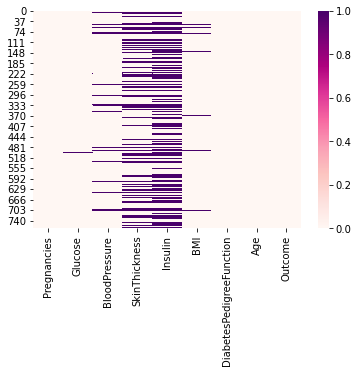

In [186]:
sns.heatmap(df.isnull(),cmap="RdPu")

If we drop the null values, we will loose too much information. So let's replace them, but replace them with what? Do we choose the mean, median, mode or some other arbituary number?

If we choose either the mean, median or mode, we must split the data into the training and testing set to ensure the value (i.e. mean, median or mode) is not leaked over from the testing set.

In [187]:
from sklearn.model_selection import train_test_split

In [188]:
x=df.drop(["Outcome"],axis=1)
y=df["Outcome"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=7)

In [189]:
print("Training set x shape:",x_train.shape,"and y shape:",y_train.shape)
print("Testing set shape:",x_test.shape,"and y shape:",y_test.shape)

Training set x shape: (514, 8) and y shape: (514,)
Testing set shape: (254, 8) and y shape: (254,)


Now we can impute the replacing value (i.e. mean, median or mode) from only the training set.

Let's take a look at each column to decide which metric to use:

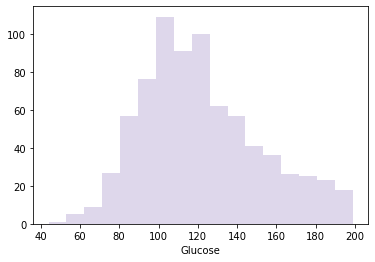

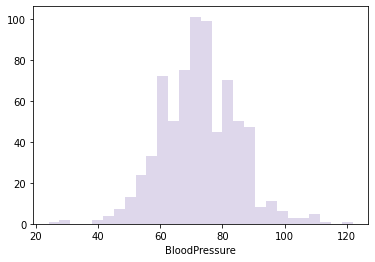

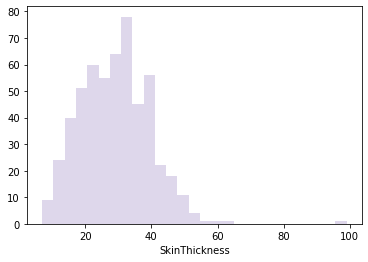

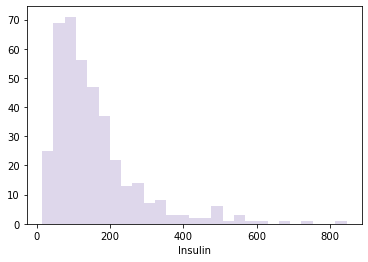

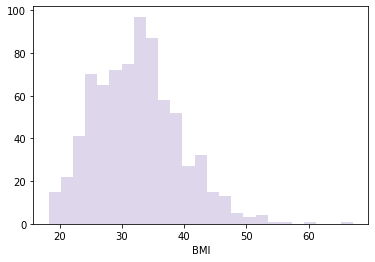

In [190]:
for i in x_train[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]]:
    plt.figure()
    sns.distplot(df[i],kde=False,color="#AE9CCD")

For *Glucose* and *BloodPressure* I will use the mean; while for the *SkinThickness*, *Insulin* and *BMI* I will use the median. This is based on their distribution (*Glucose* and *BloodPressure* have a more normal distribution whereas *SkinThickness*, *Insulin* and *BMI* are more skewed).

First fill in the missing values in the training set:

In [191]:
print("The number of null values:")
print(x_train.isnull().sum())

The number of null values:
Pregnancies                   0
Glucose                       5
BloodPressure                24
SkinThickness               153
Insulin                     252
BMI                           7
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


In [192]:
x_train["Glucose"].fillna(x_train["Glucose"].mean(),inplace=True)
x_train["BloodPressure"].fillna(x_train["BloodPressure"].mean(),inplace=True)
x_train["SkinThickness"].fillna(x_train["SkinThickness"].median(),inplace=True)
x_train["Insulin"].fillna(x_train["Insulin"].median(),inplace=True)
x_train["BMI"].fillna(x_train["BMI"].median(),inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [193]:
print("Check there are no more null values:")
print(x_train.isnull().sum())

Check there are no more null values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


Now fill in the missing values in the testing set using the training set:

In [194]:
print("The number of null values:")
print(x_test.isnull().sum())

The number of null values:
Pregnancies                   0
Glucose                       0
BloodPressure                11
SkinThickness                74
Insulin                     122
BMI                           4
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


In [195]:
x_test["Glucose"].fillna(x_train["Glucose"].mean(),inplace=True)
x_test["BloodPressure"].fillna(x_train["BloodPressure"].mean(),inplace=True)
x_test["SkinThickness"].fillna(x_train["SkinThickness"].median(),inplace=True)
x_test["Insulin"].fillna(x_train["Insulin"].median(),inplace=True)
x_test["BMI"].fillna(x_train["BMI"].median(),inplace=True)

In [196]:
print("Check there are no more null values:")
print(x_test.isnull().sum())

Check there are no more null values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


The data is now nice and clean, but will need to be scaled to ensure columns with higher values do not have a higher weighting.

But as before, to avoid any data leakage, we will only fit the scaler to the training set and not the testing set (i.e. fit and transform the training set, but only transform the testing set).

In [197]:
from sklearn.preprocessing import StandardScaler

In [198]:
scaler=StandardScaler()

In [199]:
x_train=scaler.fit_transform(x_train)

In [200]:
x_test=scaler.transform(x_test)

It is finally time to model the data!

Let's try as many algorithms as we can.

In [201]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

The algorithms will be evaluated based on the number of False Negatives and accuracy.

The accuracy score will tell us how accurately the model predicts the True Positives and True Negatives, which is still essential, but there is a trade-off between having a model that predicts more False Positives (predicting diabetes in a healthy person) vs False Negatives (predicting no diabetes in a person that does have diabetes) - i.e. type 1 error vs type 2 error respectively. I think it is more important to prevent type 2 errors to ensure that patients are not overlooked.

In [202]:
from sklearn.metrics import classification_report,confusion_matrix

In [203]:
name=["Logistic","kNN","DecisionTree","RandomForest","GradientBoost","AdaBoost","SVM","LGBM","XGB"]
models=[LogisticRegression(random_state=7),KNeighborsClassifier(),DecisionTreeClassifier(random_state=7),RandomForestClassifier(random_state=7),GradientBoostingClassifier(random_state=7),AdaBoostClassifier(random_state=7),SVC(random_state=7),LGBMClassifier(random_state=7),XGBClassifier(random_state=7)]
score=[]
falsenegative=[]

for model in models:
    model.fit(x_train,y_train)
    score.append(model.score(x_test,y_test))
    y_predict=model.predict(x_test)
    tn,fp,fn,tp=confusion_matrix(y_test,y_predict).ravel()
    falsenegative.append(fn)

In [204]:
results=pd.DataFrame({"name":name,"models":models,"score":score,"fn":falsenegative})
results.sort_values(["fn","score"],ascending=[True,False])

,name,models,score,fn
4,GradientBoost,([DecisionTreeRegressor(criterion='friedman_ms...,0.759843,30
2,DecisionTree,DecisionTreeClassifier(random_state=7),0.740157,30
5,AdaBoost,"(DecisionTreeClassifier(max_depth=1, random_st...",0.736220,33
6,SVM,SVC(random_state=7),0.767717,34
1,kNN,KNeighborsClassifier(),0.736220,34
3,RandomForest,"(DecisionTreeClassifier(max_features='auto', r...",0.767717,35
7,LGBM,LGBMClassifier(random_state=7),0.728346,35
8,XGB,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.728346,35
0,Logistic,LogisticRegression(random_state=7),0.751969,36


Thus the best model is the Gradient Boosting Classifier with the lowest number of False Negatives and the third highest accuracy.

In [205]:
model=GradientBoostingClassifier(random_state=7)
model.fit(x_train,y_train)
y_predict=model.predict(x_test)

In [206]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       162
           1       0.67      0.67      0.67        92

    accuracy                           0.76       254
   macro avg       0.74      0.74      0.74       254
weighted avg       0.76      0.76      0.76       254



In [207]:
print(confusion_matrix(y_test,y_predict))

[[131  31]
 [ 30  62]]


The model is based on its default parameters:

* loss="deviance"
* learning_rate=0.1
* n_estimators=100
* subsample=1.0
* criterion="friedman_mse"
* min_samples_split=2
* min_samples_leaf=1
* min_weight_fraction_leaf=0.0
* max_depth=3
* min_impurity_decrease=0.0
* initestimator=None
* random_state=None
* max_features=None
* verbose=0
* max_leaf_nodes=None
* warm_start=False
* validation_fraction=0.1
* n_iter_no_change=None
* tol=1e-4
* ccp_alpha=0.0

 Perhaps the model can be improved by tuning its parameters.

In [39]:
from sklearn.model_selection import GridSearchCV

In [210]:
params={
    "loss":["exponential"],
    "learning_rate":[0.01,0.05,0.1,0.15,0.2],
    #"n_estimators":[],
    "subsample":[0.8,0.9,1.0],
    "criterion":["friedman_mse"],
    #"min_samples_split":[],
    #"min_samples_leaf":[],
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"]
}

In [212]:
grid=GridSearchCV(GradientBoostingClassifier(random_state=7),params,refit=True,verbose=1)
grid.fit(x_train,y_train)
y_predict=grid.predict(x_test)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  2.5min finished


In [213]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       162
           1       0.71      0.71      0.71        92

    accuracy                           0.79       254
   macro avg       0.77      0.77      0.77       254
weighted avg       0.79      0.79      0.79       254



In [214]:
print(confusion_matrix(y_test,y_predict))

[[135  27]
 [ 27  65]]


The model has improved - precision, recall, f1-score and accuracy all increased; and the number of False Negatives and False Positives both decreased!

The model may be further improved by - for example - adjusting its parameters (as above); collecting more data, and data with minimal missing information; and conducting feature engineering and selection.